In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cluster_tools as ct
import errors as err

In [2]:
df=pd.read_csv('eco.csv',skiprows=4)
df_green=df[df['Indicator Name']=='Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)']
df_fuel=df[df['Indicator Name']=='CO2 emissions from liquid fuel consumption (kt)']

In [3]:
df_green

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
36,Aruba,ABW,"Other greenhouse gas emissions, HFC, PFC and S...",EN.ATM.GHGO.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,Africa Eastern and Southern,AFE,"Other greenhouse gas emissions, HFC, PFC and S...",EN.ATM.GHGO.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,73024.711699,68559.004214,73149.431507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,Afghanistan,AFG,"Other greenhouse gas emissions, HFC, PFC and S...",EN.ATM.GHGO.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,-416.537849,-691.202515,-1800.003578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Africa Western and Central,AFW,"Other greenhouse gas emissions, HFC, PFC and S...",EN.ATM.GHGO.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,67013.961170,58562.639187,60900.757134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Angola,AGO,"Other greenhouse gas emissions, HFC, PFC and S...",EN.ATM.GHGO.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,8094.435791,5850.063721,5203.067139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19872,Kosovo,XKX,"Other greenhouse gas emissions, HFC, PFC and S...",EN.ATM.GHGO.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19948,"Yemen, Rep.",YEM,"Other greenhouse gas emissions, HFC, PFC and S...",EN.ATM.GHGO.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,368.901367,-10730.082764,-14417.989990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20024,South Africa,ZAF,"Other greenhouse gas emissions, HFC, PFC and S...",EN.ATM.GHGO.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,52918.142578,45882.779297,49022.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100,Zambia,ZMB,"Other greenhouse gas emissions, HFC, PFC and S...",EN.ATM.GHGO.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,1044.914547,1439.153206,1849.415859,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.set_index('Country Name', drop=True)
df = df.loc[:, '1960':'2022']

In [5]:
df_tr=df.transpose()

In [6]:
df_green.loc[:, '1970':'2011']

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
36,1.966790e+01,19.957364,2.000577e+01,1.971669e+01,18.926185,1.542933e+01,30.513269,3.640090e+01,9.520859e+01,1.210306e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,1.587419e+06,962644.869127,1.013297e+06,1.074440e+06,949134.973398,1.101879e+06,984931.848519,1.119055e+06,1.176445e+06,1.529059e+06,...,27150.517473,22082.333655,28499.036494,16324.459548,15362.027187,18215.263098,24455.624223,27924.616917,42800.270788,48331.319894
188,-6.799159e+02,-584.266024,-3.650310e+02,-2.957563e+02,-67.278590,-8.872324e+02,-824.052898,-3.579535e+02,-2.135118e+03,-1.357840e+03,...,-1189.828190,-1123.433636,-1604.836014,-1272.787895,-1163.728977,-381.266068,613.016979,1144.771751,2581.595875,5607.860027
264,3.521524e+05,318598.958309,3.154583e+05,3.319855e+05,260832.401232,2.890227e+05,288489.056943,3.423781e+05,3.024699e+05,3.326105e+05,...,1790.315023,-96.466920,6671.859092,16313.801124,22860.661488,27861.381216,29389.336767,21972.710207,31147.883131,37461.949830
340,8.006983e+02,1098.795636,4.106709e+02,-3.315519e+02,-536.065944,-1.598511e+02,1990.557829,-1.459180e+03,-2.181471e+03,-2.191465e+03,...,-1079.994446,1883.654175,3070.825684,3464.719421,4681.312012,7244.090698,6583.134155,6826.585938,5488.927002,6458.200439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19948,5.853912e-01,0.867790,3.225027e+00,5.798467e+00,3.388810,5.137318e+00,5.779552,6.250548e+00,8.485371e+00,1.501415e+01,...,-1181.300659,-1576.527344,-1474.894043,-1985.488281,-2731.784424,-4002.375000,-2706.510254,-1176.861328,-2812.424805,-1569.001953
20024,2.025148e+04,18720.160547,1.203691e+04,1.178844e+04,9676.354297,9.482561e+03,8568.228594,8.524653e+03,6.808431e+03,9.571253e+03,...,28985.537109,22627.890625,26422.919922,12827.117188,9400.929688,7556.562500,13354.039062,15479.113281,31794.289062,33844.240234
20100,1.547863e+05,93213.549346,9.893249e+04,1.050675e+05,92926.799604,1.079867e+05,96345.732539,1.099450e+05,1.158475e+05,1.504295e+05,...,45.541443,67.077370,61.181591,117.689354,-364.260372,360.982126,452.079895,574.259098,571.162973,621.689056


In [7]:
df_green=df_green.set_index('Country Name', drop=True)
df_green_cor=df_green.loc[:, '1990':'2000']

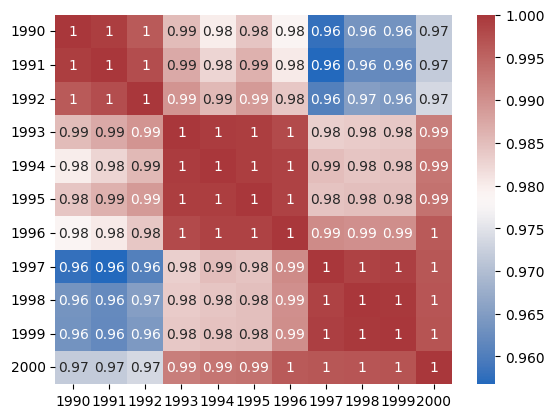

In [8]:
matrix=(df_green_cor).corr()
sns.heatmap(matrix, annot=True, cmap='vlag')
plt.show()

In [9]:
# df_green = df_green.set_index('Country Name', drop=True)
df_green = df_green.loc[:, '1970':'2010']

In [10]:
df_green_T=df_green.transpose()

In [11]:
df_green_T.columns

Index(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina',
       ...
       'Virgin Islands (U.S.)', 'Viet Nam', 'Vanuatu', 'World', 'Samoa',
       'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country Name', length=266)

In [12]:
df_green

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,1.966790e+01,19.957364,2.000577e+01,1.971669e+01,18.926185,1.542933e+01,30.513269,3.640090e+01,9.520859e+01,1.210306e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,1.587419e+06,962644.869127,1.013297e+06,1.074440e+06,949134.973398,1.101879e+06,984931.848519,1.119055e+06,1.176445e+06,1.529059e+06,...,29919.739655,27150.517473,22082.333655,28499.036494,16324.459548,15362.027187,18215.263098,24455.624223,27924.616917,42800.270788
Afghanistan,-6.799159e+02,-584.266024,-3.650310e+02,-2.957563e+02,-67.278590,-8.872324e+02,-824.052898,-3.579535e+02,-2.135118e+03,-1.357840e+03,...,-1452.085331,-1189.828190,-1123.433636,-1604.836014,-1272.787895,-1163.728977,-381.266068,613.016979,1144.771751,2581.595875
Africa Western and Central,3.521524e+05,318598.958309,3.154583e+05,3.319855e+05,260832.401232,2.890227e+05,288489.056943,3.423781e+05,3.024699e+05,3.326105e+05,...,-10610.090311,1790.315023,-96.466920,6671.859092,16313.801124,22860.661488,27861.381216,29389.336767,21972.710207,31147.883131
Angola,8.006983e+02,1098.795636,4.106709e+02,-3.315519e+02,-536.065944,-1.598511e+02,1990.557829,-1.459180e+03,-2.181471e+03,-2.191465e+03,...,-1945.818909,-1079.994446,1883.654175,3070.825684,3464.719421,4681.312012,7244.090698,6583.134155,6826.585938,5488.927002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",5.853912e-01,0.867790,3.225027e+00,5.798467e+00,3.388810,5.137318e+00,5.779552,6.250548e+00,8.485371e+00,1.501415e+01,...,-1204.082031,-1181.300659,-1576.527344,-1474.894043,-1985.488281,-2731.784424,-4002.375000,-2706.510254,-1176.861328,-2812.424805
South Africa,2.025148e+04,18720.160547,1.203691e+04,1.178844e+04,9676.354297,9.482561e+03,8568.228594,8.524653e+03,6.808431e+03,9.571253e+03,...,31973.597656,28985.537109,22627.890625,26422.919922,12827.117188,9400.929688,7556.562500,13354.039062,15479.113281,31794.289062


In [13]:
df_green_na=df_green.dropna()

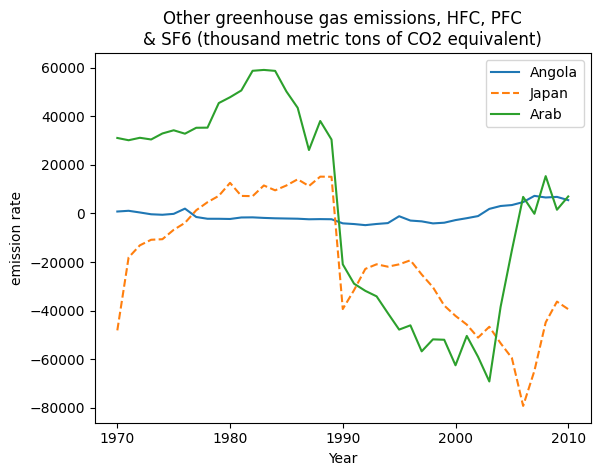

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x_values = list(df_green.columns)
angola_values = df_green_T["Angola"].to_list()
Albania_value=df_green_T['Japan'].to_list()
arab_value=df_green_T['Arab World'].to_list()
# Plotting the data
plt.plot(x_values, angola_values, linestyle='-',label='Angola')
plt.plot(x_values, Albania_value, linestyle='--',label='Japan')
plt.plot(x_values, arab_value, linestyle='-',label='Arab')
ticks = np.linspace(0, len(list(df_green.columns)) - 1, 5, dtype=int)
plt.xticks(ticks)
# plt.xticklabels(list(df_green.columns).iloc[ticks], rotation=20)
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('emission rate')
plt.title('Other greenhouse gas emissions, HFC, PFC\n& SF6 (thousand metric tons of CO2 equivalent)')
plt.legend()
# Display the plot
plt.show()

In [15]:
df_green_na.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010'],
      dtype='object')

c:\Users\welcome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


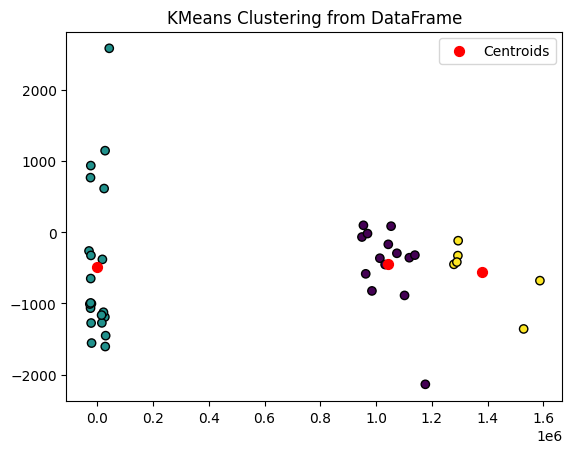

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose the number of clusters
num_clusters = 3

# Extract the relevant columns for clustering
X = df_green_T.loc[:,'Africa Eastern and Southern':'Albania']

# Create a KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points with different colors for each cluster
plt.scatter(X['Africa Eastern and Southern'], X['Afghanistan'], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=50, label='Centroids')
plt.title('KMeans Clustering from DataFrame')
plt.legend()
plt.show()



In [17]:
df_fuel

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
43,Aruba,ABW,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,11092.67500,11576.719000,12713.489000,12178.107000,11840.743000,10623.299000,...,872.746,898.415,883.747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,Africa Eastern and Southern,AFE,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,19042.53518,21102.655839,22561.037401,23749.338206,28592.569339,29917.201248,...,163665.544,161509.348,164886.655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Afghanistan,AFG,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,271.35800,293.360000,363.033000,392.369000,476.710000,542.716000,...,3773.343,4741.431,3476.316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Africa Western and Central,AFW,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,6934.29700,7422.008000,7623.693000,8401.097000,9699.215000,12115.768000,...,124190.289,114733.096,121869.078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,Angola,AGO,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,348.36500,311.695000,1008.425000,1034.094000,1041.428000,1012.092000,...,28265.236,17080.886,17931.630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19879,Kosovo,XKX,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,1587.811,1954.511,1914.174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19955,"Yemen, Rep.",YEM,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,58.67200,73.340000,69.673000,80.674000,99.009000,102.676000,...,20769.888,9372.852,8104.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20031,South Africa,ZAF,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,9075.82500,10373.943000,11100.009000,11705.064000,15298.724000,15133.709000,...,56684.486,60721.853,60424.826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20107,Zambia,ZMB,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,NaN,NaN,NaN,NaN,447.374000,583.053000,...,2922.599,3003.273,2940.934,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_fuel=df_fuel.set_index('Country Name', drop=True)
df_fuel=df_fuel.loc[:,'1960':'2010']
df_fuel_T=df_fuel.transpose()

In [21]:
Years=list(df_fuel.columns)
Years = [int(year) for year in Years]
Years

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [23]:
a_value= np.array(df_fuel_T['Arab World'].to_list())

Text(0, 0.5, 'Rate')

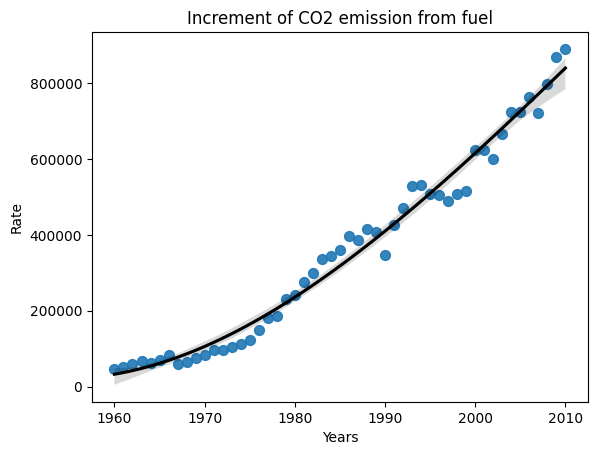

In [49]:
sns.regplot(x=Years, y=a_value, line_kws={"color": "black"},order=3,ci=90,scatter_kws={'s':50,'alpha':0.9})
# Set plot title, x-axis label, and y-axis label
plt.title(f"Increment of CO2 emission from fuel")
plt.xlabel("Years")
plt.ylabel("Rate")